# EDA - Campeonato Brasileiro de Futebol

## 1. Introdução

É inegável a importância do futebol na sociedade brasileira. Presente nas discussões cotidianas, permeando o noticiário e tendo forte influência na política e na cultura do país, o futebol e a paixão do torcedor do torcedor por seu clube rende inúmeras célebres citações e é objeto de análise diária, tanto em canais esportivos da televisão e internet quanto no cotidiano do torcedor brasileiro. 

Ao encontrar esse dataset no kaggle, surgiu a ideia de realizar uma análise exploratória geral dos datasets disponibilizados, e depois utilizá-los para verificar se existe um paralelo entre algumas citações comuns ao futebol se aplicado ao Campeonato Brasileiro. Ao final, se utilizará as estatísticas disponibilizadas para verificar como jogaram os últimos times campeões brasileiros.

* "A torcida paga ingresso para ver o time vencer." Muricy Ramalho 
* "Clássico é um campeonato a parte"
* "Títulos de liga são ganhos nos últimos oito jogos, mas eles são perdidos nos primeiros oito" Pep Guardiola

## 2. Dados

Os Dataset estão disponiveis no [Kaggle](https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol?select=campeonato-brasileiro-gols.csv).
Contem dados sobre o campeonato brasileiro de futebol dos anos de 2003 a 2023, com partidas de ano a ano.


### Dicionario

O dicionario de dados se encontra dentro da pasta 'dados' no arquivo 'Legenda.txt'


## 3. EDA

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Desativar todos os warnings
warnings.filterwarnings("ignore")

In [2]:
partidas_br = pd.read_csv('dados/campeonato-brasileiro-full.csv')
stats = pd.read_csv('dados/campeonato-brasileiro-estatisticas-full.csv')

In [3]:
partidas_br.shape

(8405, 16)

In [4]:
partidas_br.head()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


In [6]:
# Verificando duplicidade
partidas_br['ID'].nunique()

8405

In [7]:
partidas_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405 entries, 0 to 8404
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  8405 non-null   int64 
 1   rodata              8405 non-null   int64 
 2   data                8405 non-null   object
 3   hora                8405 non-null   object
 4   mandante            8405 non-null   object
 5   visitante           8405 non-null   object
 6   formacao_mandante   3431 non-null   object
 7   formacao_visitante  3431 non-null   object
 8   tecnico_mandante    3795 non-null   object
 9   tecnico_visitante   3795 non-null   object
 10  vencedor            8405 non-null   object
 11  arena               8405 non-null   object
 12  mandante_Placar     8405 non-null   int64 
 13  visitante_Placar    8405 non-null   int64 
 14  mandante_Estado     8405 non-null   object
 15  visitante_Estado    8405 non-null   object
dtypes: int64(4), object(12)


Os módulos a seguir foram criados durante o curso de Formação Analista de Dados (FADA) da Data Science Academy com auxilio do professor em video aula

Os módulos se tratam de técnicas de tratamento de dados que podem ser reutilizadas em diferentes casos e análises, sendo necessária somente a importação do mesmo

A seguir segue a descrição de cada módulo

valores_ausentes.py -
- identifica a porcentagem de valores ausentes
- diversas funções com técnicas de tratamentos dos valores ausentes, sendo elas:
    - imputação (bfill, ffill, media e mediana)
    - drop de linhas ou colunas

conversao.py - Modulos de conversão dos tipos de dados para
- data
- string
- int64
- fator

outliers.py - 
- identifica a porcentagem de outliers
- realiza o tratamento desses outliers (podendo ser o drop/exclusão dos mesmos, ou replace/modificação)


In [11]:
from modulos import valores_ausentes

In [15]:
valores_ausentes.func_calc_percentual_valores_ausentes(partidas_br)

O dataset tem 14.25 % de valores ausentes.


In [16]:
valores_ausentes.func_calc_percentual_valores_ausentes_coluna(partidas_br)

O dataset tem 16 colunas.
Encontrado: 4 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
formacao_mandante,4974,59.18,object
formacao_visitante,4974,59.18,object
tecnico_mandante,4610,54.85,object
tecnico_visitante,4610,54.85,object


In [17]:
valores_ausentes.func_calc_percentual_valores_ausentes_linha(partidas_br)

59.21 % das linhas no conjunto de dados contêm pelo menos um valor ausente.


O arquivo 'campeonato-brasileiro-full' contem informações sobre todas as partidas realizadas para a Série A do campeonato brasileiro, de 2003 a 2023 (era dos pontos corridos). Nota-se que o dataset contem 8405 entradas com informações de partidas realizadas e que todos os ID's são únicos, o que permite assumir que não existem entradas duplicadas. 

Em relação aos dados, percebe-se que existem dados nulos para as colunas 'formacao_mandante', 'formacao_visitante', 'tecnico_mandante' e 'tecnico_visitante'. Essas informações não serão utilizadas em análises posteriores. Quanto ao tipo de variável, detectou-se que data e hora estão no formato 'object', mas deveriam ser 'datetime64'.

In [18]:
partidas_br.describe()

,ID,rodata,mandante_Placar,visitante_Placar
count,8405.00000,8405.000000,8405.000000,8405.000000
mean,4203.00000,20.133254,1.541225,1.027008
std,2426.45884,11.444643,1.230607,1.027170
min,1.00000,1.000000,0.000000,0.000000
25%,2102.00000,10.000000,1.000000,0.000000
50%,4203.00000,20.000000,1.000000,1.000000
75%,6304.00000,30.000000,2.000000,2.000000
max,8405.00000,46.000000,7.000000,7.000000


Text(0, 0.5, 'Vitórias')

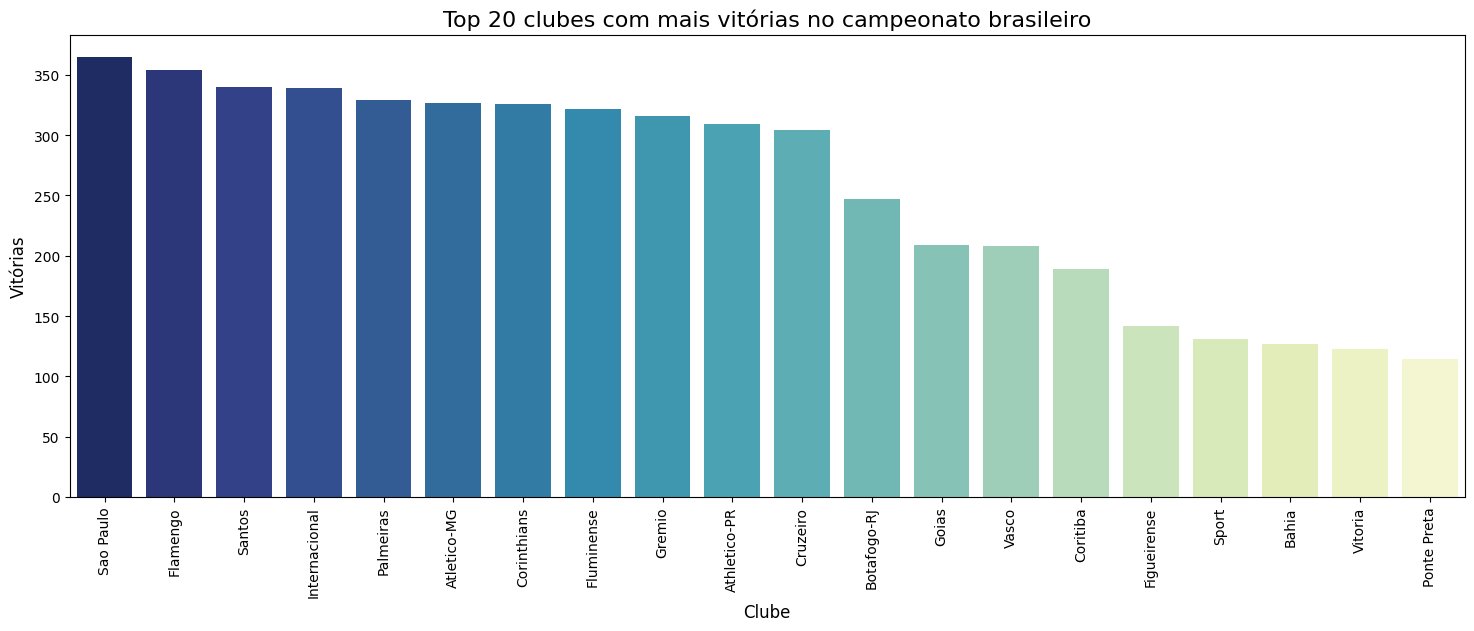

In [69]:
# Maiores vencedores
mais_vitorias = partidas_br['vencedor'].value_counts()
mais_vitorias = mais_vitorias[1:]
mais_vitorias= mais_vitorias.to_frame().reset_index()

mais_vitorias=mais_vitorias.rename(columns={'vencedor':'clube', 'count':'vitorias'})

fig, ax = plt.subplots(figsize = (18,6))
ax = sns.barplot(data=mais_vitorias[:20], x = 'clube', y='vitorias', palette = 'YlGnBu_r')
plt.title("Top 20 clubes com mais vitórias no campeonato brasileiro", fontsize = 16)
plt.xticks(fontsize = 10, rotation=90)
plt.xlabel('Clube', fontsize = 12)
plt.ylabel('Vitórias', fontsize = 12)


In [70]:
mais_vitorias.head()

,clube,vitorias
0,Sao Paulo,365
1,Flamengo,354
2,Santos,340
3,Internacional,339
4,Palmeiras,329


Text(0.5, 0, 'Número de gols')

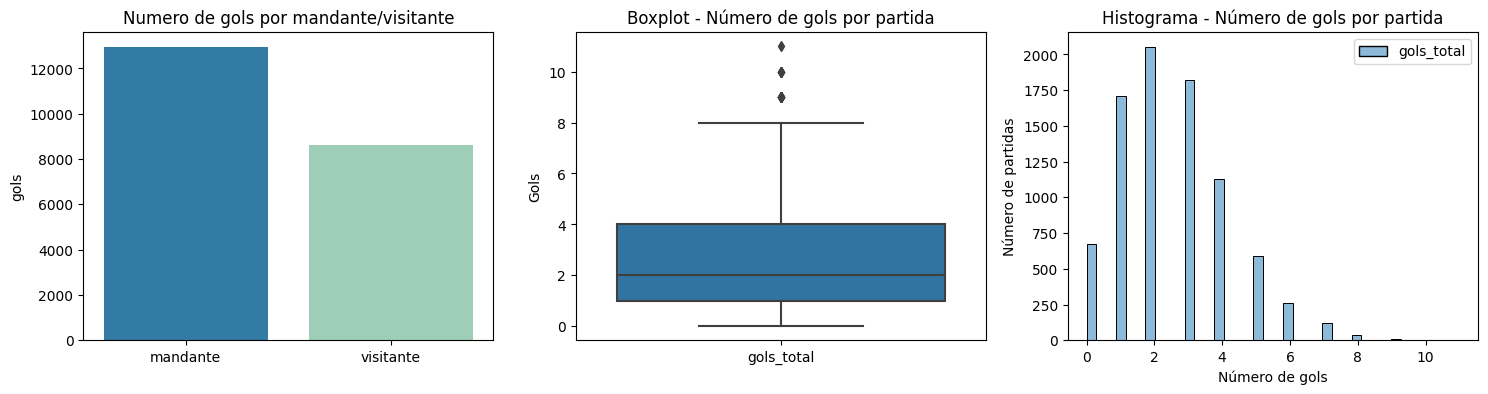

In [74]:
# GOLs

#numero de gols mandante e visitante
numero_gols = {'mandante':partidas_br['mandante_Placar'].sum(), 'visitante':partidas_br['visitante_Placar'].sum()}
numero_gols = pd.DataFrame({'Tipo':numero_gols.keys(), 'gols':numero_gols.values()})

fig, axes = plt.subplots(1, 3, figsize = (18,4))

#plot gols
sns.barplot(data=numero_gols, x='Tipo', y='gols', palette = 'YlGnBu_r', ax=axes[0])
axes[0].set_title('Numero de gols por mandante/visitante')
axes[0].set_xlabel('')

#gols por partida
gols_partida=pd.DataFrame(partidas_br['mandante_Placar']+partidas_br['visitante_Placar'], columns=['gols_total'])

#plot boxplot gols por partida
sns.boxplot(data=gols_partida, ax= axes[1])
axes[1].set_title('Boxplot - Número de gols por partida')
axes[1].set_ylabel('Gols')

#plot histograma gols 
sns.histplot(data=gols_partida, ax=axes[2])
axes[2].set_title('Histograma - Número de gols por partida')
axes[2].set_ylabel('Número de partidas')
axes[2].set_xlabel('Número de gols')

In [89]:
from modulos.outliers import *

In [91]:
ver_outliers = TrataOutlier(gols_partida)

In [97]:
gols_partida.dtypes

gols_total    int64
dtype: object

In [98]:
# Lista de colunas int64
lista_colunas = gols_partida.select_dtypes('int64').columns.tolist()

In [109]:
ver_outliers.getOverview(lista_colunas)

Nome de Coluna,gols_total
Min,0
Q1,1.0
Median,2.0
Q3,4.0
Max,11
IQR,3.0
Lower fence,-3.5
Upper fence,8.5
Skew,0.679933
Num_Outliers,13


In [113]:
#Encontrar partida com mais gols
partida_mais_gols = gols_partida.loc[gols_partida['gols_total']==gols_partida['gols_total'].max()].index.values.astype(int)[0]
partidas_br[['data', 'mandante', 'visitante','mandante_Placar', 'visitante_Placar']].iloc[partida_mais_gols]

data                22/10/2003
mandante                 Bahia
visitante               Santos
mandante_Placar              4
visitante_Placar             7
Name: 450, dtype: object

- Analisando os dados de partidas, temos o São Paulo com o maior número de vitórias no campeonato (351), seguido por Flamengo (335) e Santos (329). 
- Em relação aos gols, o número de gols marcados pelos mandantes prevalecem sobre o número de gols marcados pelos visitantes. Comparando o número de gols marcados por partida, temos uma média de 1,547 gols de mandante por partida e 1,025 gols de visitante por partida, com 50% das partidas com 2 gols ou menos, enquanto somente 25% das partidas tiveram 4 gols ou mais. 
- A partida com maior número de gols da história do Brasileirao foi Bahia 4 x 7 Santos, em 2003, com um total de 11 gols.
